In [2]:
from geometry.coord import Coord
from geometry.circle import Circle
from geometry.path import Path
from two_threats import two_threats_shortest_path_with_budget_constraint_discretized_mid_targets
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
import numpy as np

C:\Users\fogle\AppData\Local\Temp\ipykernel_6132\995552723.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
budget = 300
partition = [0.5, 0.5]

source, target = Coord(-50, 100), Coord(700, 0)

center1, radius1 = Coord(100, 100), 100
center2, radius2 = Coord(500, -100), 150

circle1 = Circle(center1, radius1)
circle2 = Circle(center2, radius2)

In [3]:
path, length, risk = two_threats_shortest_path_with_budget_constraint_discretized_mid_targets(source, target, circle1,
                                                                                              circle2, budget,
                                                                                              partition)

TypeError: concat_paths() missing 1 required positional argument: 'path2'

In [4]:
length

773.176188792894

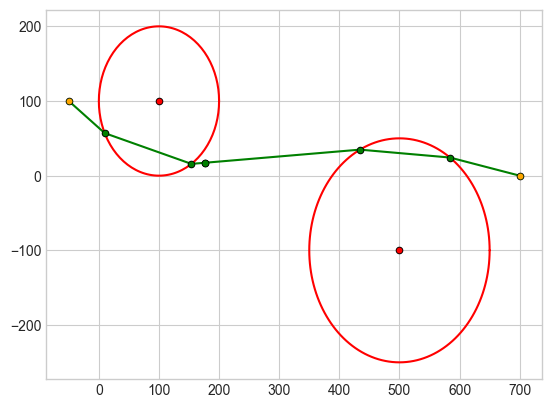

In [6]:
circle1.plot()
circle2.plot()
Path(path).plot()

# exp1

In [19]:
budget = 200

source, target = Coord(-50, 100), Coord(700, 0)

center1, radius1 = Coord(100, 100), 100
center2, radius2 = Coord(500, -100), 150

circle1 = Circle(center1, radius1)
circle2 = Circle(center2, radius2)

In [20]:
paths = []
lengths = []
risks = []
b1s = list(np.arange(0, 1, 0.1))
for b1 in b1s:
    path, length, risk = two_threats_shortest_path_with_budget_constraint_discretized_mid_targets(source, target,
                                                                                                  circle1, circle2,
                                                                                                  budget,
                                                                                                  (b1, budget - b1))
    paths.append(path)
    lengths.append(length)
    risks.append(risk)

planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 141.44
planning with risk limit 40000.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 144.04
planning with risk limit 40000.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 146.16
planning with risk limit 40000.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 147.87
planning with risk limit 40000.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under t

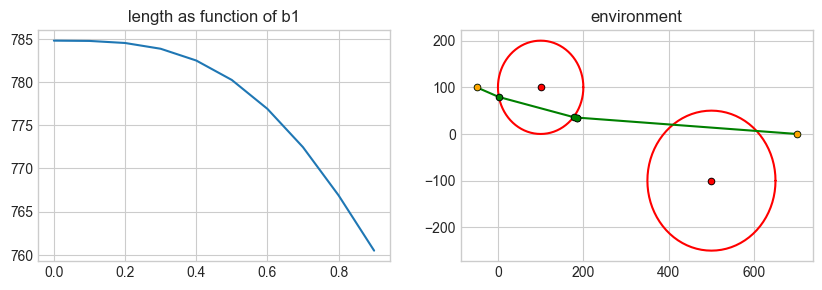

In [21]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('length as function of b1')
plt.plot(b1s, lengths)

plt.subplot(1, 2, 2)
plt.title('environment')
circle1.plot()
circle2.plot()
Path(path).plot()

# exp2

In [25]:
budget = 150

source, target = Coord(-100, 100), Coord(700, -100)

center1, radius1 = Coord(150, 50), 200
center2, radius2 = Coord(500, -100), 150

circle1 = Circle(center1, radius1)
circle2 = Circle(center2, radius2)

In [26]:
paths = []
lengths = []
risks = []
b1s = list(np.arange(0, 1, 0.1))
for b1 in b1s:
    path, length, risk = two_threats_shortest_path_with_budget_constraint_discretized_mid_targets(source, target,
                                                                                                  circle1, circle2,
                                                                                                  budget,
                                                                                                  (b1, budget - b1))
    paths.append(path)
    lengths.append(length)
    risks.append(risk)

planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 343.63
planning with risk limit 22500.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 345.7
planning with risk limit 22500.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 347.5
planning with risk limit 22500.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 349.04
planning with risk limit 22500.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the

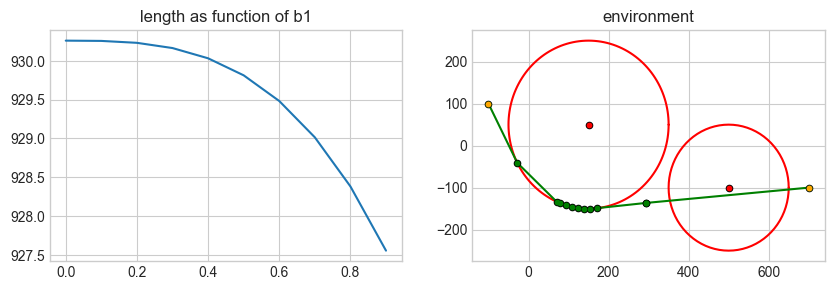

In [27]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('length as function of b1')
plt.plot(b1s, lengths)

plt.subplot(1, 2, 2)
plt.title('environment')
circle1.plot()
circle2.plot()
Path(path).plot()

In [100]:
import networkx as nx

g = nx.DiGraph()

g.add_edge((10, 10), (20, 10))
g.add_edge((20, 10), (30, 10))
g.add_edge((30, 10), (40, 10))

g.add_edge((10, 10), (15, 15))
g.add_edge((15, 15), (20, 10))
g.add_edge((20, 10), (25, 15))
g.add_edge((25, 15), (30, 10))
g.add_edge((30, 10), (35, 15))
g.add_edge((35, 15), (40, 10))

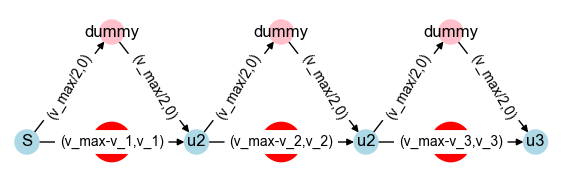

In [101]:
plt.figure(figsize=(7,2))
colors = ['pink'  if (node[0] % 10 == 5) else 'lightblue' for node in g.nodes]
labels = {}
labels[(10,10)] = 'S'
labels[(20,10)] = 'u2'
labels[(30,10)] = 'u2'
labels[(40,10)] = 'u3'

labels[(15,15)] = 'dummy'
labels[(25,15)] = 'dummy'
labels[(35,15)] = 'dummy'

plt.scatter([15,25,35],[10,10,10],color='red',zorder=1,s=[800 for i in range(3)])

nx.draw(g, pos={node: node for node in g.nodes}, node_color=colors, labels=labels, with_labels=True)
nx.draw_networkx_edge_labels(
    g, {node: node for node in g.nodes},
    edge_labels={((10,10), (20,10)): '(v_max-v_1,v_1)',
                 ((20,10), (30,10)): '(v_max-v_2,v_2)',
                 ((30,10), (40,10)): '(v_max-v_3,v_3)',
                 ((10,10), (15,15)): '(v_max/2,0)',
                 ((20,10), (25,15)): '(v_max/2,0)',
                 ((30,10), (35,15)): '(v_max/2,0)',
                 ((15,15), (20,10)): '(v_max/2,0)',
                 ((25,15), (30,10)): '(v_max/2,0)',
                 ((35,15), (40,10)): '(v_max/2,0)'},
    font_color='black'
)

plt.xlim([9,41])
plt.ylim([9,16])
plt.savefig('reduction_from_knapsack.png')

In [102]:
g = nx.DiGraph()

g.add_edge((10, 10), (20, 20))
g.add_edge((20, 20), (30, 20))
g.add_edge((30, 20), (40, 20))

g.add_edge((10, 10), (20, 0))
g.add_edge((20, 0), (30, 0))
g.add_edge((30, 0), (40, 0))

g.add_edge((20, 20), (30, 0))
g.add_edge((20, 0), (30, 20))

g.add_edge((30, 20), (40, 0))
g.add_edge((30, 0), (40, 20))

g.add_edge((40, 20), (50, 10))
g.add_edge((40, 0), (50, 10))

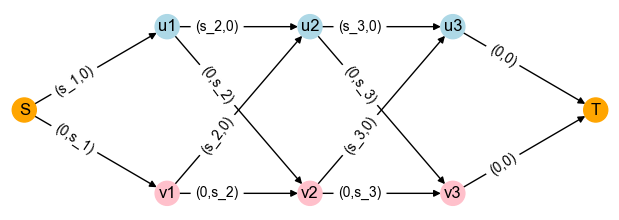

In [118]:
plt.figure(figsize=(6,2))

colors = ['pink'  if (node[1] == 0) else 'lightblue' for node in g.nodes]
colors[0] = colors[-1] = 'orange'

pos = {node: node for node in g.nodes}

labels = {}
labels[(10,10)] = 'S'
labels[(50,10)] = 'T'

labels[(20,20)] = 'u1'
labels[(30,20)] = 'u2'
labels[(40,20)] = 'u3'

labels[(20,0)] = 'v1'
labels[(30,0)] = 'v2'
labels[(40,0)] = 'v3'

nx.draw(g, pos=pos, node_color=colors, labels=labels, with_labels=True)
nx.draw_networkx_edge_labels(
    g, {node: node for node in g.nodes},
    edge_labels={((10,10), (20,20)): '(s_1,0)',
                 ((20,20), (30,20)): '(s_2,0)',
                 ((30,20), (40,20)): '(s_3,0)',
                 ((40,20), (50,10)): '(0,0)',
                 ((10,10), (20,0)): '(0,s_1)',
                 ((20,0), (30,0)): '(0,s_2)',
                 ((30,0), (40,0)): '(0,s_3)',
                 ((40,0), (50,10)): '(0,0)',
                 ((20,20), (30,0)): '(0,s_2)',
                 ((20,0), (30,20)): '(s_2,0)',
                 ((30,20), (40,0)): '(0,s_3)',
                 ((30,0), (40,20)): '(s_3,0)'},
    font_color='black',
    label_pos=0.65
)

plt.xlim([9,51])
plt.ylim([-2,22])
plt.savefig('reduction_from_partition.png')

ValueError: math domain error

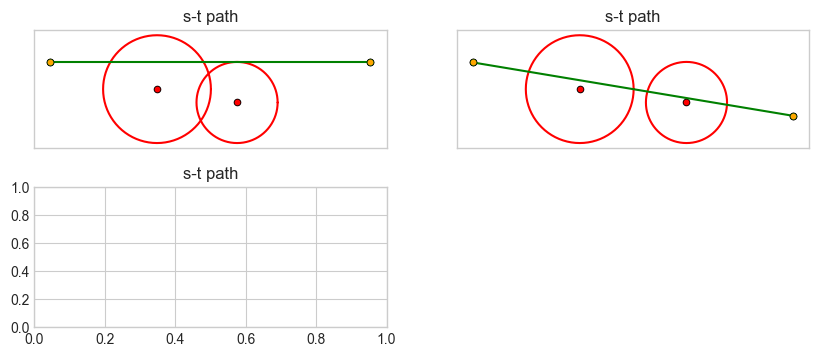

In [145]:
from algorithms.two_threats import two_threats_shortest_path_with_budget_constraint
from algorithms.single_threat import single_threat_shortest_path_with_budget_constraint

plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
plt.title('s-t path')

circle1 = Circle(Coord(200,200),100)
circle2 = Circle(Coord(350,175),75)
source = Coord(0,250)
target = Coord(600,250)
path = single_threat_shortest_path_with_budget_constraint(source, target, circle, 500)[0]

circle1.plot()
circle2.plot()
source.plot()
target.plot()
path.plot()
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.title('s-t path')

circle1 = Circle(Coord(200,200),100)
circle2 = Circle(Coord(400,175),75)
source = Coord(0,250)
target = Coord(600,150)
path = single_threat_shortest_path_with_budget_constraint(source, target, circle, 500)[0]

circle1.plot()
circle2.plot()
source.plot()
target.plot()
path.plot()
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.title('s-t path')

circle1 = Circle(Coord(200,200),100)
circle2 = Circle(Coord(350,175),75)
source = Coord(0,250)
target = Coord(600,250)
path = two_threats_shortest_path_with_budget_constraint(source, target, circle1, circle2, 500)[0]

circle1.plot()
circle2.plot()
source.plot()
target.plot()
path.plot()
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.title('s-t path')

circle1 = Circle(Coord(200,200),100)
circle2 = Circle(Coord(400,175),75)
source = Coord(0,250)
target = Coord(600,250)
path = single_threat_shortest_path_with_budget_constraint(source, target, circle, 500)[0]

circle1.plot()
circle2.plot()
source.plot()
target.plot()
path.plot()
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])

plt.savefig('two_circles_cases.png')

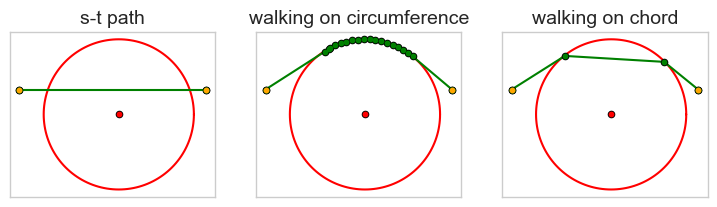

In [149]:
from algorithms.single_threat import single_threat_shortest_path_with_budget_constraint

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.title('s-t path', fontsize=14)

circle = Circle(Coord(200,200),150)
source = Coord(0,250)
target = Coord(375,250)
path = single_threat_shortest_path_with_budget_constraint(source, target, circle, 500)[0]

circle.plot()
source.plot()
target.plot()
path.plot()
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.title('walking on circumference', fontsize=14)

path = single_threat_shortest_path_with_budget_constraint(source, target, circle, 10)[0]

circle.plot()
source.plot()
target.plot()
path.plot()
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.title('walking on chord', fontsize=14)

path = single_threat_shortest_path_with_budget_constraint(source, target, circle, 200)[0]

circle.plot()
source.plot()
target.plot()
path.plot()
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])

plt.savefig('single_circle_cases.png')